# Crime classification

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder


In [164]:
# Creating the function that returns the percentage of each class in the dataset 

def imbalance(elements):
    percent=[]
    sum_of_elements=np.sum(elements)
    for i in range(len(elements)):
        percent.append((elements[i]/sum_of_elements)*100)
    return percent

In [165]:
# Function to create imbalanced dataset, imb_percent represents the imbalance in decimals.

def create_imbalanced_data_for_stars(imb_percent, size_of_one_class):
    size = int(size_of_one_class/imb_percent)
    #data = pd.DataFrame(data=dt)
    data_0 = dat.query("ViolentCrime==1").sample(size-size_of_one_class)
    data_1 = dat.query("ViolentCrime==0")
    return pd.concat([data_0, data_1])

In [166]:
# Loading and displaying the rows of the dataset

dat = pd.read_csv("CrimeClassification.csv")
dat.head()

,Hour,DayOfWeek,Month,Year,PdDistrict,Address,ViolentCrime
0,10,6,7,2005,INGLESIDE,'800 Block of SAN JOSE AV',No
1,10,4,1,2014,CENTRAL,'400 Block of POST ST',No
2,16,3,8,2007,CENTRAL,'500 Block of GEARY ST',No
3,5,7,1,2010,NORTHERN,'600 Block of LARKIN ST',No
4,1,3,6,2008,SOUTHERN,'8TH ST / BRANNAN ST',No


In [167]:
# size and type of data

dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538638 entries, 0 to 538637
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Hour          538638 non-null  int64 
 1   DayOfWeek     538638 non-null  int64 
 2   Month         538638 non-null  int64 
 3   Year          538638 non-null  int64 
 4   PdDistrict    538638 non-null  object
 5   Address       538638 non-null  object
 6   ViolentCrime  538638 non-null  object
dtypes: int64(4), object(3)
memory usage: 28.8+ MB


In [168]:
# Check if any null values are present

dat.isnull().values.any()

False

After having a glance at the dataset, we can say that PdDistrict and ViolentCrime are categorical. Also Address is a free text column and hence can be dropped from the dataset.

In [169]:
#dropping the Address column from the dataset...

dat = dat.drop('Address', axis=1)

print("---ViolentCrime---")
print(dat["ViolentCrime"].value_counts())
print()
print("---PdDistrict---")
print(dat["PdDistrict"].value_counts())

---ViolentCrime---
No     269319
Yes    269319
Name: ViolentCrime, dtype: int64

---PdDistrict---
SOUTHERN      93432
MISSION       76308
NORTHERN      63229
BAYVIEW       59229
INGLESIDE     53315
CENTRAL       52685
TENDERLOIN    48614
TARAVAL       39113
PARK          27410
RICHMOND      25303
Name: PdDistrict, dtype: int64


In [170]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538638 entries, 0 to 538637
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Hour          538638 non-null  int64 
 1   DayOfWeek     538638 non-null  int64 
 2   Month         538638 non-null  int64 
 3   Year          538638 non-null  int64 
 4   PdDistrict    538638 non-null  object
 5   ViolentCrime  538638 non-null  object
dtypes: int64(4), object(2)
memory usage: 24.7+ MB


Encoding is a required pre-processing step when working with categorical data for machine learning algorithms. We need to encode the ViolentCrime and PdDistrict columns. Since ViolentCrime is the label, we will use LabelEncoder and OneHotEncoding for the PdDistrict column.

In [171]:
#Encoding the ViolentCrime with LabelEncoder... 
label_encoder = preprocessing.LabelEncoder()
dat['ViolentCrime']= label_encoder.fit_transform(dat['ViolentCrime']) 

# Encoding the PdDistrict with OneHotEncoder() using the get_dummies function from pandas...
dat = pd.get_dummies(dat)

# Displaying the data after encoding 
dat.head()

,Hour,DayOfWeek,Month,Year,ViolentCrime,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,10,6,7,2005,0,0,0,1,0,0,0,0,0,0,0
1,10,4,1,2014,0,0,1,0,0,0,0,0,0,0,0
2,16,3,8,2007,0,0,1,0,0,0,0,0,0,0,0
3,5,7,1,2010,0,0,0,0,0,1,0,0,0,0,0
4,1,3,6,2008,0,0,0,0,0,0,0,0,1,0,0


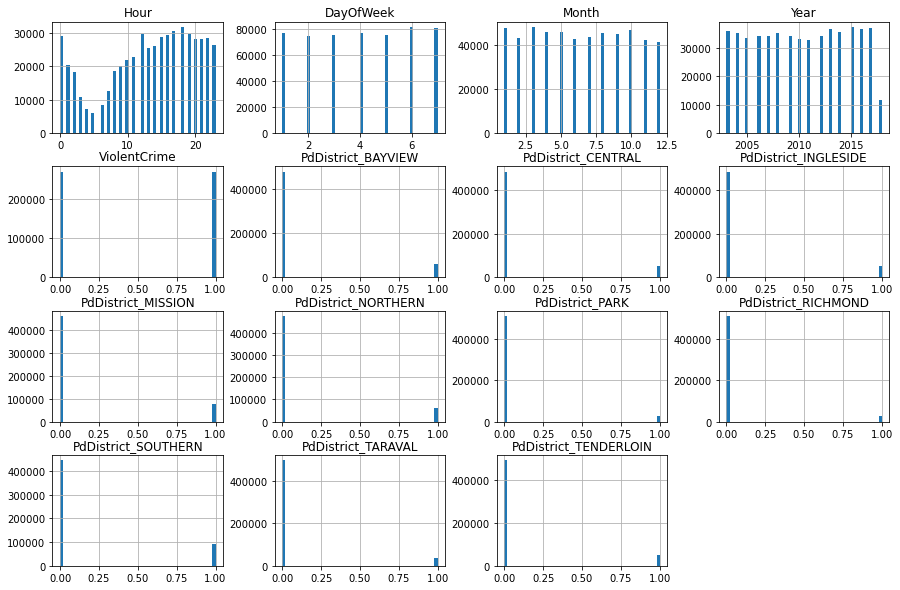

In [172]:
# Plotting all the columns after encoding is done

_ = dat.hist(bins=50, figsize=(15,10))

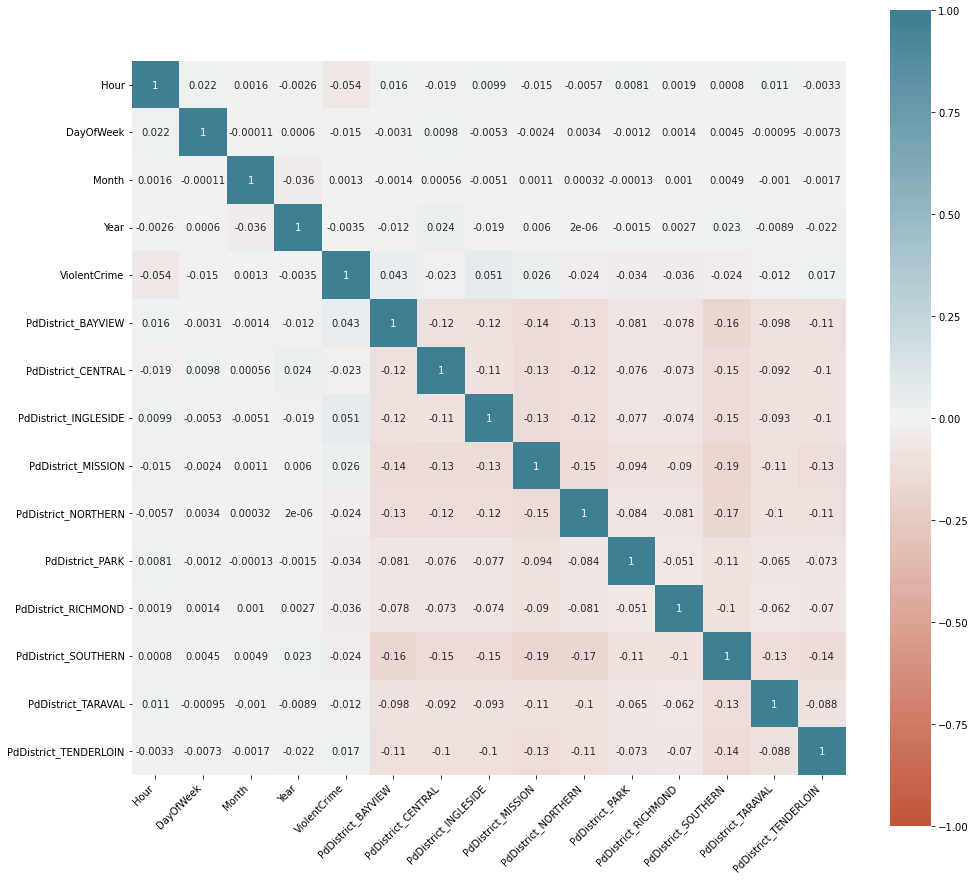

In [173]:
# Plotting a correlation matrix

plt.figure(figsize = (16,15))
ax = sn.heatmap(
    dat.corr(), 
    vmin=-1, vmax=1, center=0,
    annot = True,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Before we introduce imbalance in the dataset, let us first plot the graph to figure out the current imbalance in the dataset,if any.

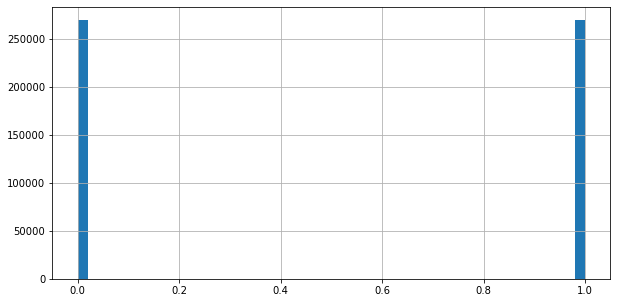

In [174]:
# Plotting the ViolentCrime column and visually checking if any imbalance is present

_ = dat["ViolentCrime"].hist(bins=50, figsize=(10,5))

The dataset looks very balanced, let us also calculate the current imbalance...

In [175]:
imbalance([dat["ViolentCrime"].value_counts()[0], dat["ViolentCrime"].value_counts()[1]])

[50.0, 50.0]

## Dataset with low imbalance

Since there is no imbalance in the dataset whatsoever, we will consider 0 as the majority class and will 1 as the minority class 

In [180]:
data_imbalanced_1 = create_imbalanced_data_for_stars(0.65, 264000)
print(imbalance([data_imbalanced_1["ViolentCrime"].value_counts()[0], data_imbalanced_1["ViolentCrime"].value_counts()[1]]))
data_imbalanced_1["ViolentCrime"].value_counts()

[65.45257028424777, 34.54742971575222]


0    269319
1    142153
Name: ViolentCrime, dtype: int64

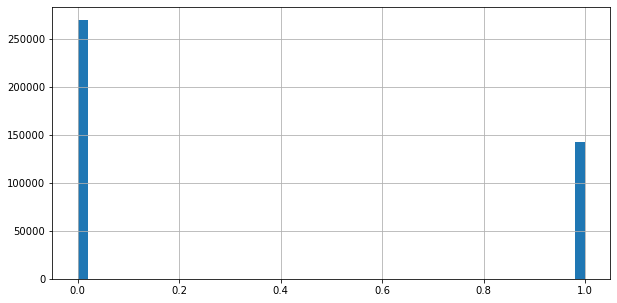

In [181]:
_ = data_imbalanced_1["ViolentCrime"].hist(bins=50, figsize=(10,5))

## Dataset with medium imbalance

In [182]:
data_imbalanced_2 = create_imbalanced_data_for_stars(0.75, 264000)
print(imbalance([data_imbalanced_2["ViolentCrime"].value_counts()[0], data_imbalanced_2["ViolentCrime"].value_counts()[1]]))
data_imbalanced_2["ViolentCrime"].value_counts()


[75.37214645736722, 24.627853542632774]


0    269319
1     88000
Name: ViolentCrime, dtype: int64

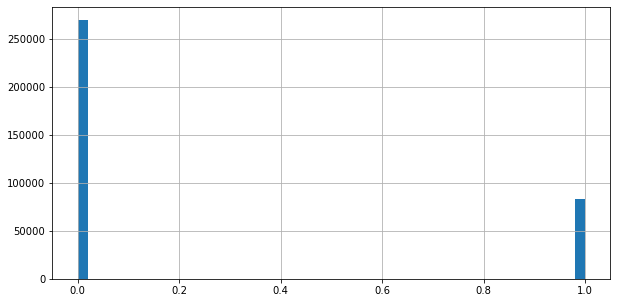

In [150]:
_ = data_imbalanced_2["ViolentCrime"].hist(bins=50, figsize=(10,5))

## Dataset with high imbalance 

In [183]:
data_imbalanced_3 = create_imbalanced_data_for_stars(0.9, 264000)
print(imbalance([data_imbalanced_3["ViolentCrime"].value_counts()[0], data_imbalanced_3["ViolentCrime"].value_counts()[1]]))
data_imbalanced_2["ViolentCrime"].value_counts()


[90.17820071521369, 9.821799284786307]


0    269319
1     88000
Name: ViolentCrime, dtype: int64

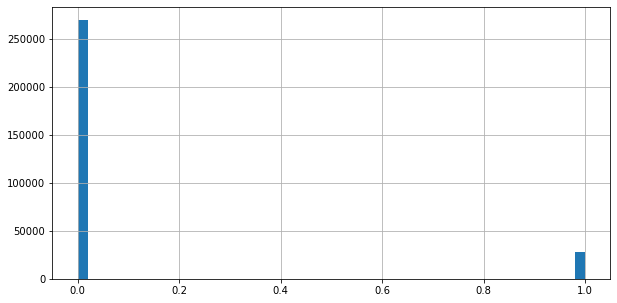

In [151]:
_ = data_imbalanced_3["ViolentCrime"].hist(bins=50, figsize=(10,5))